In [1]:
from matplotlib import pyplot as plt
from scipy.stats import moment
%matplotlib inline
plt.rcParams["figure.dpi"] = 80
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.libqsturng as slb
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math

In [2]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [3]:
def skewness(data):
    m2 = moment(data, moment=2)
    m3 = moment(data, moment=3)
    m4 = moment(data, moment=4)
    return m3 / pow(pow(m2, 0.5), 3)

In [4]:
def outlier(data_k):
    Q1 = percentile(data_k, 25)
    Q2 = percentile(data_k, 50)
    Q3 = percentile(data_k, 75)
    IQR =Q3 - Q1    #IQR is interquartile range. 
    print("Q1 = ", Q1)
    print("Q2 = ", Q2)
    print("Q3 = ", Q3)
    print("IQR = ", IQR)
    filter = (data_k < Q1 - 1.5 * IQR) | (data_k > Q3 + 1.5 * IQR)
    print("Outliers are listed as follows \n")
    print(data_k.loc[filter])

In [5]:
def percentile(data1, p):
    if type(data1) == np.ndarray:        
        alldata = data1.copy()
        data1 = data1.copy()
    else:
        alldata = data1.values.copy()
        data1 = data1.values.copy()
    alldata.sort()
    n = alldata.size
    l = (n + 1) * p / 100 - 1
    f_l = math.floor(l)
    c_l = math.ceil(l)
    percentile_v = alldata[f_l] + (alldata[c_l] - alldata[f_l]) * (l - f_l)
    return percentile_v

## NBA Player Stat

In [6]:
player = pd.read_csv('nba_player_stats.csv')

player["gs_rate"] = player["GS"] / player["G"]
player["Core"] = ["Main" if (rate >= 0.9 and g >= 5 and  mp >= 10) else "Other" for rate, g, mp in zip(player["gs_rate"], player["G"], player["MP"])]
display(player)

print(player["Core"].value_counts())

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,VORP,2023-24_Salary,StateLevel,Level1,Level2,PosCtg,Gaurd,Forward,gs_rate,Core
0,0,Stephen Curry,PG,35,GSW,74,74,32.7,8.8,19.5,...,4.4,51915615,1,1,0,G,1,0,1.0,Main
1,1,Kevin Durant,PF,35,PHO,75,75,37.2,10.0,19.1,...,4.3,47649433,2,0,1,F,0,1,1.0,Main
2,2,Joel Embiid,C,29,PHI,39,39,33.6,11.5,21.8,...,4.5,47607350,1,1,0,C,0,0,1.0,Main
3,3,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,5.4,47607350,1,1,0,F,0,1,1.0,Main
4,4,Bradley Beal,SG,30,PHO,53,53,33.3,7.1,13.9,...,1.1,46741590,2,0,1,G,1,0,1.0,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,Jalen Crutcher,PG,24,NOP,1,0,3.0,0.0,1.0,...,0.0,64343,3,0,0,G,1,0,0.0,Other
490,490,Izaiah Brockington,PG,24,NOP,1,0,3.0,2.0,5.0,...,0.0,64343,3,0,0,G,1,0,0.0,Other
491,491,Timmy Allen,SF,24,MEM,5,0,25.0,1.2,4.6,...,-0.3,64343,2,0,1,F,0,1,0.0,Other
492,492,Kaiser Gates,SF,27,NOP,1,0,7.0,0.0,4.0,...,-0.1,35389,3,0,0,F,0,1,0.0,Other


Other    391
Main     103
Name: Core, dtype: int64


### Basic Statistic

Age:
average:  25.779352226720647
standar deviation:  4.2122218051588165
skewness:  0.794644560476857


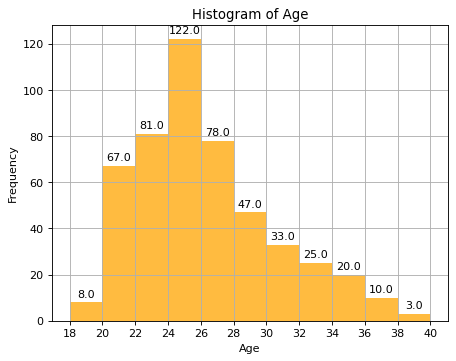

In [44]:
bin_range = range(18, 42, 2)
counts, bins, rects = plt.hist(player["Age"], bins = bin_range, density=False, facecolor='orange', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Age:")
print("average: ", np.mean(player["Age"]))
print("standar deviation: ", np.std(player["Age"]))
print("skewness: ", skewness(player["Age"]))

2023-24_Salary:
average:  8593873.4048583
standar deviation:  11067602.72773844
skewness:  1.8500508210381228


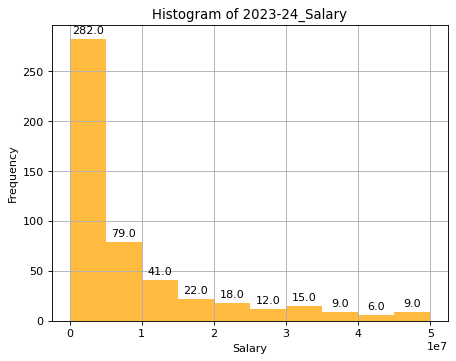

In [45]:
bin_range = range(0, 55000000, 5000000)
counts, bins, rects = plt.hist(player["2023-24_Salary"], density=False, bins=bin_range, facecolor='orange', alpha=0.75)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of 2023-24_Salary')
plt.grid(True)
# plt.xticks(bin_range)
autolabel(rects)

print("2023-24_Salary:")
print("average: ", np.mean(player["2023-24_Salary"]))
print("standar deviation: ", np.std(player["2023-24_Salary"]))
print("skewness: ", skewness(player["2023-24_Salary"]))

Game Played:
average:  46.56072874493927
standar deviation:  25.468154209152214
skewness:  -0.33252703046225845


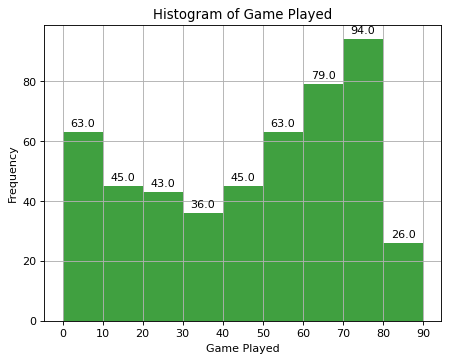

In [46]:
bin_range = range(0, 100, 10)
counts, bins, rects = plt.hist(player["G"], bins = bin_range, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Game Played')
plt.ylabel('Frequency')
plt.title('Histogram of Game Played')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Game Played:")
print("average: ", np.mean(player["G"]))
print("standar deviation: ", np.std(player["G"]))
print("skewness: ", skewness(player["G"]))

Game Started:
average:  21.62145748987854
standar deviation:  26.88430048282114
skewness:  0.9829311986860001


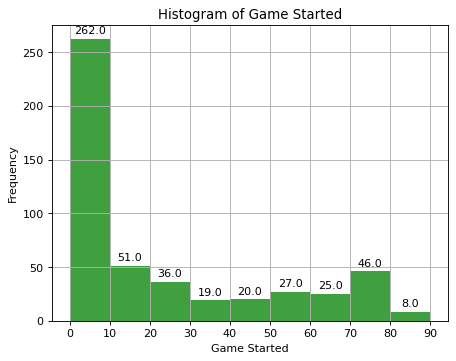

In [47]:
bin_range = range(0, 100, 10)
counts, bins, rects = plt.hist(player["GS"], bins = bin_range, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Game Started')
plt.ylabel('Frequency')
plt.title('Histogram of Game Started')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Game Started:")
print("average: ", np.mean(player["GS"]))
print("standar deviation: ", np.std(player["GS"]))
print("skewness: ", skewness(player["GS"]))

Game Started Rate:
average:  0.34795120023597875
standar deviation:  0.3925162986552091
skewness:  0.7114479637200286

There are 16% players who is in starting line-up for every game in this season.
There are 31% players who is never in starting line-up in this season.


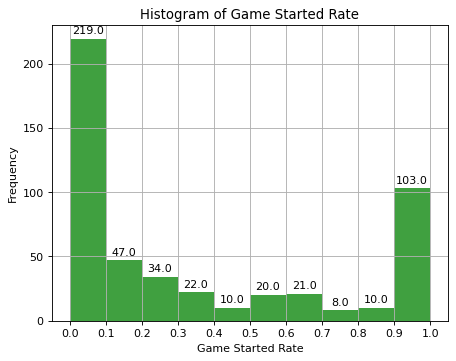

In [48]:
bin_range = [x / 10.0 for x in range(0, 11)]
counts, bins, rects = plt.hist(player["gs_rate"], bins = bin_range, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Game Started Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Game Started Rate')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Game Started Rate:")
print("average: ", np.mean(player["gs_rate"]))
print("standar deviation: ", np.std(player["gs_rate"]))

all_gs_rate = len(player[player["gs_rate"] == 1]["G"]) / len(player["G"])
never_gs_rate = len(player[player["gs_rate"] == 0]["G"]) / len(player["G"])
print("skewness: ", skewness(player["gs_rate"]))
print("")
print(f'There are {round(all_gs_rate * 100)}% players who is in starting line-up for every game in this season.')
print(f"There are {round(never_gs_rate * 100)}% players who is never in starting line-up in this season.")

Points per Game:
average:  8.47975708502024
standar deviation:  6.846323161499208
skewness:  1.1736429118868292


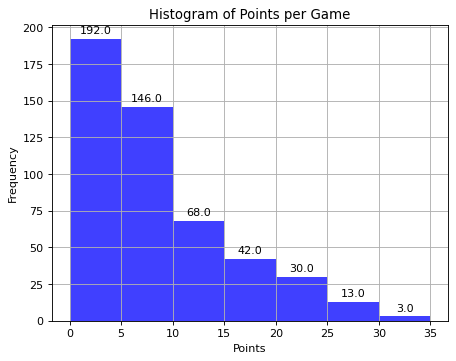

In [49]:
bin_range = range(0, 40, 5)
counts, bins, rects = plt.hist(player["PTS"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Histogram of Points per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Points per Game:")
print("average: ", np.mean(player["PTS"]))
print("standar deviation: ", np.std(player["PTS"]))
print("skewness: ", skewness(player["PTS"]))

Field Goals:
average:  3.140283400809716
standar deviation:  2.4751511467052287
skewness:  1.0874964868490835


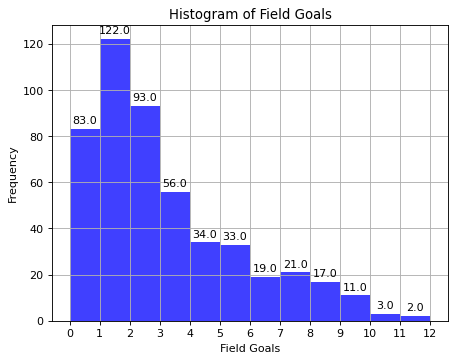

In [50]:
bin_range = range(0, 13)
counts, bins, rects = plt.hist(player["FG"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Field Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Field Goals')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Field Goals:")
print("average: ", np.mean(player["FG"]))
print("standar deviation: ", np.std(player["FG"]))
print("skewness: ", skewness(player["FG"]))

Field Goals per Game:
average:  0.4721439393939392
standar deviation:  0.07526553659293597
skewness:  0.8035966572761895


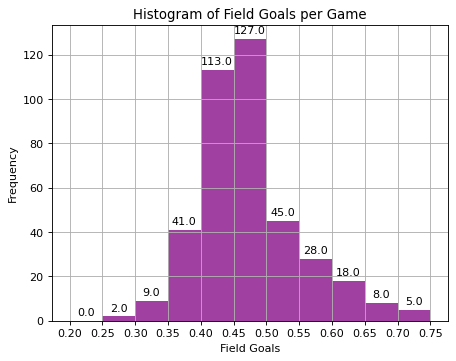

In [51]:
bin_range = [x / 20.0 for x in range(4, 16)]
counts, bins, rects = plt.hist(player[player["FG"] > 1]["FG%"], bins = bin_range, density=False, facecolor='purple', alpha=0.75)
plt.xlabel('Field Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Field Goals per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Field Goals per Game:")
print("average: ", np.mean(player[player["FG"] > 1]["FG%"]))
print("standar deviation: ", np.std(player[player["FG"] > 1]["FG%"]))
print("skewness: ", skewness(player[player["FG"] > 1]["FG%"]))

Effective Field Goals per Game:
average:  0.5483729729729732
standar deviation:  0.04162920394255888
skewness:  0.02820915656302949


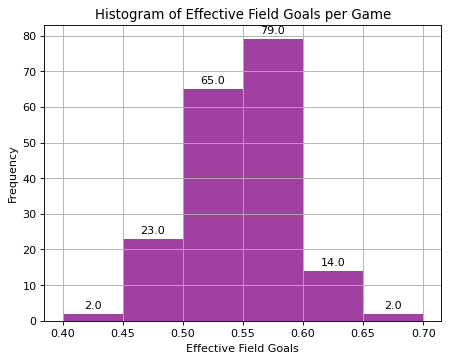

In [52]:
bin_range = [x / 20.0 for x in range(8, 15)]
counts, bins, rects = plt.hist(player[(player["FG"] > 1) & (player["3P"] > 1)]["eFG%"], bins = bin_range, density=False, facecolor='purple', alpha=0.75)
plt.xlabel('Effective Field Goals')
plt.ylabel('Frequency')
plt.title('Histogram of Effective Field Goals per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Effective Field Goals per Game:")
print("average: ", np.mean(player[(player["FG"] > 1) & (player["3P"] > 1)]["eFG%"]))
print("standar deviation: ", np.std(player[(player["FG"] > 1) & (player["3P"] > 1)]["eFG%"]))
print("skewness: ", skewness(player[(player["FG"] > 1) & (player["3P"] > 1)]["eFG%"]))

Total Rebounds per Game:
average:  3.363360323886639
standar deviation:  2.35611308518218
skewness:  1.299311192798905


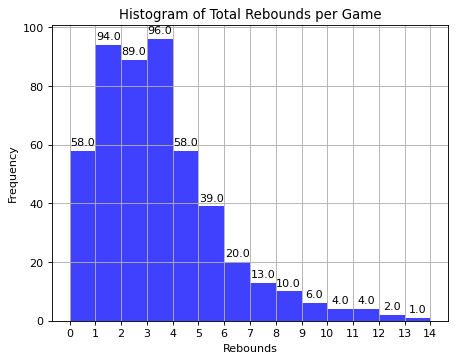

In [53]:
bin_range = range(0, 15)
counts, bins, rects = plt.hist(player["TRB"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Rebounds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rebounds per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Total Rebounds per Game:")
print("average: ", np.mean(player["TRB"]))
print("standar deviation: ", np.std(player["TRB"]))
print("skewness: ", skewness(player["TRB"]))

Assists per Game:
average:  2.0435222672064772
standar deviation:  1.8844850622674214
skewness:  1.540596094519236


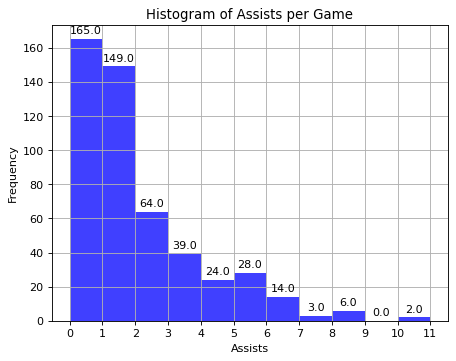

In [54]:
bin_range = range(0, 12)
counts, bins, rects = plt.hist(player["AST"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.title('Histogram of Assists per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Assists per Game:")
print("average: ", np.mean(player["AST"]))
print("standar deviation: ", np.std(player["AST"]))
print("skewness: ", skewness(player["AST"]))

Steals per Game:
average:  0.5971659919028349
standar deviation:  0.39030775874399054
skewness:  0.6653672075703155


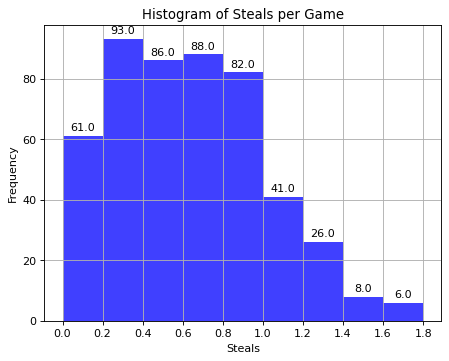

In [55]:
bin_range = [x / 5.0 for x in range(0, 10)]
counts, bins, rects = plt.hist(player["STL"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Steals')
plt.ylabel('Frequency')
plt.title('Histogram of Steals per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Steals per Game:")
print("average: ", np.mean(player["STL"]))
print("standar deviation: ", np.std(player["STL"]))
print("skewness: ", skewness(player["STL"]))

Blocks per Game:
average:  0.4022267206477724
standar deviation:  0.4084818109699562
skewness:  2.6501916837811534


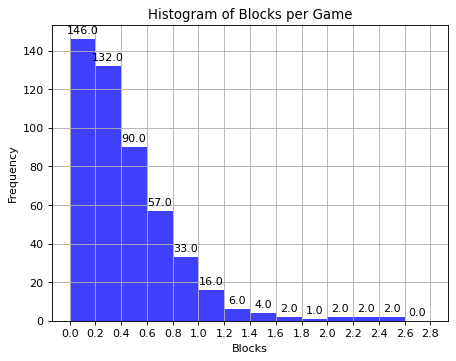

In [56]:
bin_range = [x / 5.0 for x in range(0, 15)]
counts, bins, rects = plt.hist(player["BLK"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Blocks')
plt.ylabel('Frequency')
plt.title('Histogram of Blocks per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Blocks per Game:")
print("average: ", np.mean(player["BLK"]))
print("standar deviation: ", np.std(player["BLK"]))
print("skewness: ", skewness(player["BLK"]))

Turnovers per Game:
average:  0.9910931174089074
standar deviation:  0.8050709850219969
skewness:  1.303045463472388


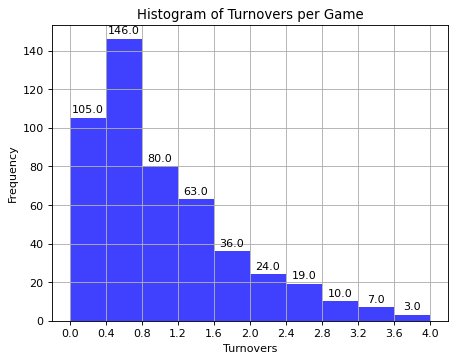

In [57]:
bin_range = [x / 5.0 for x in range(0, 22, 2)]
counts, bins, rects = plt.hist(player["TOV"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('Turnovers')
plt.ylabel('Frequency')
plt.title('Histogram of Turnovers per Game')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("Turnovers per Game:")
print("average: ", np.mean(player["TOV"]))
print("standar deviation: ", np.std(player["TOV"]))
print("skewness: ", skewness(player["TOV"]))

Text(0.5, 1.0, 'Boxplot of Minutes Played')

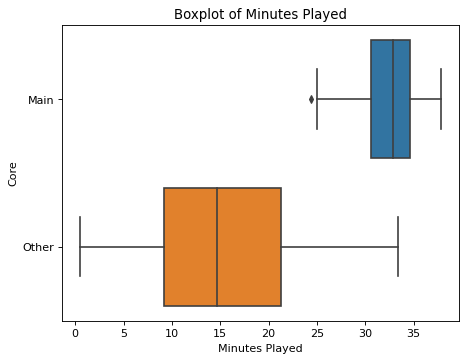

In [58]:
data = player[["Core", "MP"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="MP", data=data, orient="h")
plt.xlabel('Minutes Played')
plt.ylabel('Core')
plt.title('Boxplot of Minutes Played')

Text(0.5, 1.0, 'Boxplot of Points')

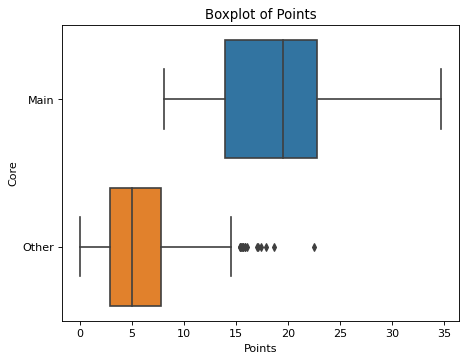

In [59]:
data = player[["Core", "PTS"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="PTS", data=data, orient="h")
plt.xlabel('Points')
plt.ylabel('Core')
plt.title('Boxplot of Points')

Outliers of Field Goals for Main Players

Q1 =  5.2
Q2 =  7.1
Q3 =  8.4
IQR =  3.2
Outliers are listed as follows 

Series([], Name: FG, dtype: float64)
Outliers of Field Goals for Other Players

Q1 =  1.0
Q2 =  1.9
Q3 =  2.9
IQR =  1.9
Outliers are listed as follows 

10     6.4
44     6.3
56     6.1
81     6.5
189    6.2
325    8.0
Name: FG, dtype: float64


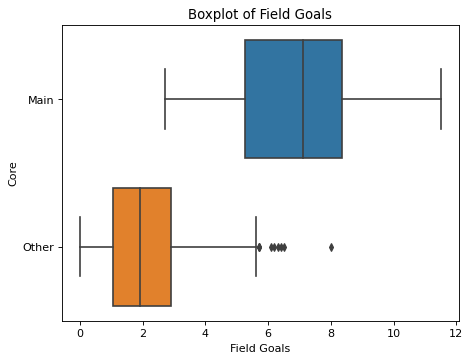

In [60]:
data = player[["Core", "FG"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="FG", data=data, orient="h")
plt.xlabel('Field Goals')
plt.ylabel('Core')
plt.title('Boxplot of Field Goals')

print("Outliers of Field Goals for Main Players\n")
outlier(player.loc[player['Core'] == "Main"]["FG"])
print("Outliers of Field Goals for Other Players\n")
outlier(player.loc[player['Core'] == "Other"]["FG"])

In [7]:
display(player.sort_values(by="FG", ascending=False)[player["Core"] == "Other"][["Player", "G", "GS", "gs_rate", "PTS", "FG"]].head())

C:\Users\User\AppData\Local\Temp\ipykernel_10340\2122746363.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(player.sort_values(by="FG", ascending=False)[player["Core"] == "Other"][["Player", "G", "GS", "gs_rate", "PTS", "FG"]].head())


,Player,G,GS,gs_rate,PTS,FG
325,Cam Thomas,66,51,0.772727,22.5,8.0
81,Collin Sexton,78,51,0.653846,18.7,6.5
10,Klay Thompson,77,63,0.818182,17.9,6.4
44,Jordan Poole,78,66,0.846154,17.4,6.3
189,Jonathan Kuminga,74,46,0.621622,16.1,6.2


Text(0.5, 1.0, 'Boxplot of Turnovers')

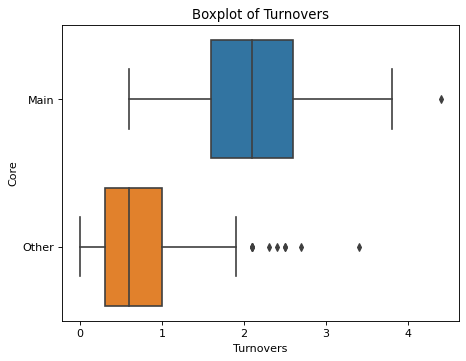

In [62]:
data = player[["Core", "TOV"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="TOV", data=data, orient="h")
plt.xlabel('Turnovers')
plt.ylabel('Core')
plt.title('Boxplot of Turnovers')

Text(0.5, 1.0, 'Boxplot of Age')

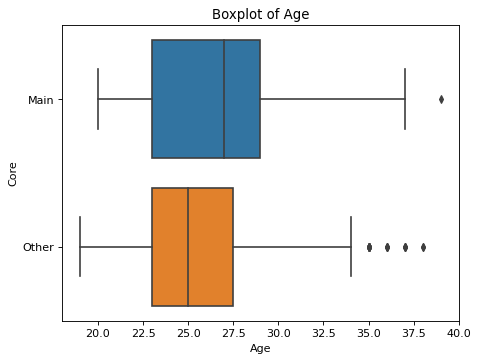

In [63]:
data = player[["Core", "Age"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="Age", data=data, orient="h")
plt.xlabel('Age')
plt.ylabel('Core')
plt.title('Boxplot of Age')

Text(0.5, 1.0, 'Boxplot of 2023-24 Salary')

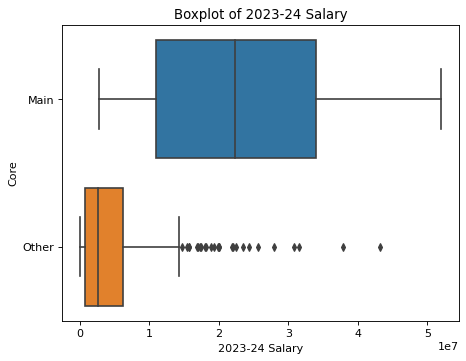

In [64]:
data = player[["Core", "2023-24_Salary"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="2023-24_Salary", data=data, orient="h")
plt.xlabel('2023-24 Salary')
plt.ylabel('Core')
plt.title('Boxplot of 2023-24 Salary')

### Position

In [8]:
main_player = player[player["GS"] >= 10]
main_player["PosCtg"].value_counts()

G    100
F     93
C     39
Name: PosCtg, dtype: int64

Text(0.5, 1.0, 'Boxplot of Points (Position)')

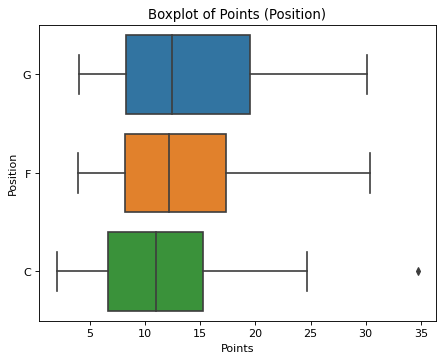

In [66]:
data = main_player[["PosCtg", "PTS"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="PTS", data=data, orient="h")
plt.xlabel('Points')
plt.ylabel('Position')
plt.title('Boxplot of Points (Position)')

Text(0.5, 1.0, 'Boxplot of 2-Point Field Goal Attempts (Position)')

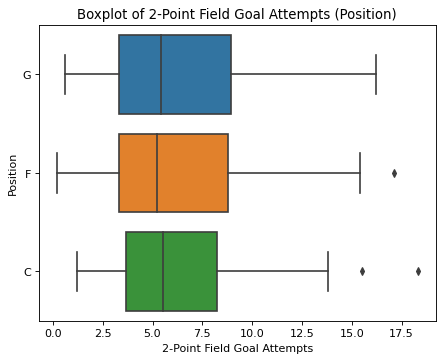

In [135]:
data = main_player[["PosCtg", "2PA"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="2PA", data=data, orient="h")
plt.xlabel('2-Point Field Goal Attempts')
plt.ylabel('Position')
plt.title('Boxplot of 2-Point Field Goal Attempts (Position)')

Text(0.5, 1.0, 'Boxplot of 2-Point Field Goals (Position)')

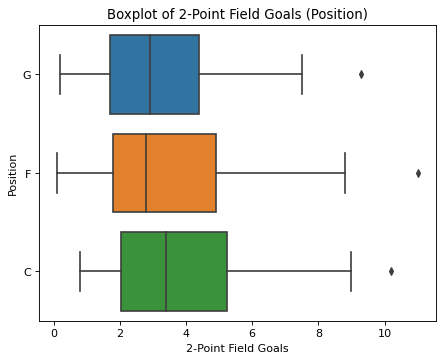

In [136]:
data = main_player[["PosCtg", "2P"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="2P", data=data, orient="h")
plt.xlabel('2-Point Field Goals')
plt.ylabel('Position')
plt.title('Boxplot of 2-Point Field Goals (Position)')

Text(0.5, 1.0, 'Boxplot of 2-Point Field Goals Percentage (Position)')

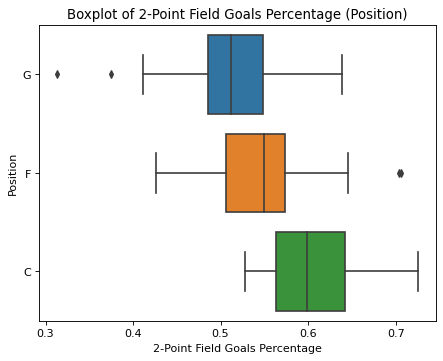

In [144]:
data = main_player[["PosCtg", "2P%"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="2P%", data=data, orient="h")
plt.xlabel('2-Point Field Goals Percentage')
plt.ylabel('Position')
plt.title('Boxplot of 2-Point Field Goals Percentage (Position)')

Text(0.5, 1.0, 'Boxplot of 3-Point Field Goal Attempts (Position)')

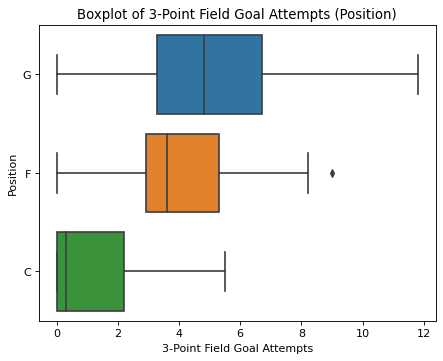

In [137]:
data = main_player[["PosCtg", "3PA"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="3PA", data=data, orient="h")
plt.xlabel('3-Point Field Goal Attempts')
plt.ylabel('Position')
plt.title('Boxplot of 3-Point Field Goal Attempts (Position)')

Text(0.5, 1.0, 'Boxplot of 3-Point Field Goals (Position)')

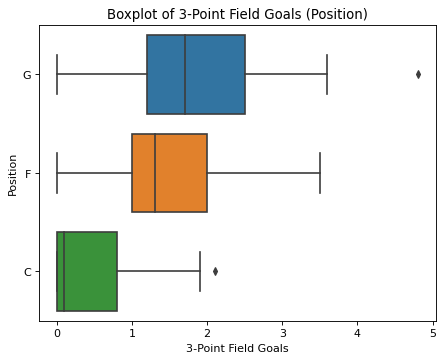

In [138]:
data = main_player[["PosCtg", "3P"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="3P", data=data, orient="h")
plt.xlabel('3-Point Field Goals')
plt.ylabel('Position')
plt.title('Boxplot of 3-Point Field Goals (Position)')

Text(0.5, 1.0, 'Boxplot of 3-Point Field Goals Percentage (Position)')

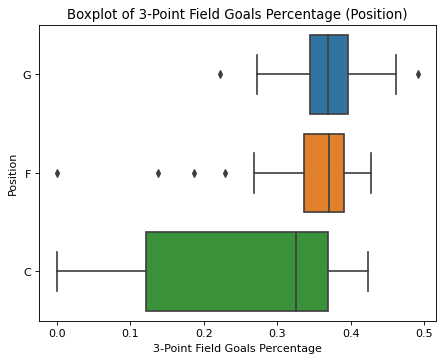

In [143]:
data = main_player[["PosCtg", "3P%"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="3P%", data=data, orient="h")
plt.xlabel('3-Point Field Goals Percentage')
plt.ylabel('Position')
plt.title('Boxplot of 3-Point Field Goals Percentage (Position)')

Text(0.5, 1.0, 'Boxplot of Free Throw Attempts (Position)')

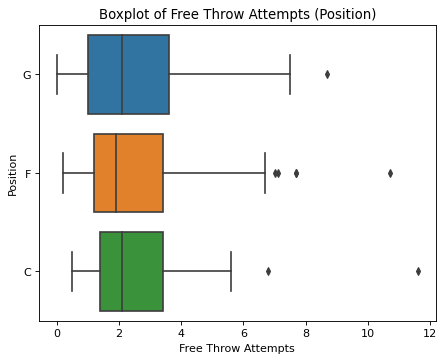

In [139]:
data = main_player[["PosCtg", "FTA"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="FTA", data=data, orient="h")
plt.xlabel('Free Throw Attempts')
plt.ylabel('Position')
plt.title('Boxplot of Free Throw Attempts (Position)')

Text(0.5, 1.0, 'Boxplot of Free Throw (Position)')

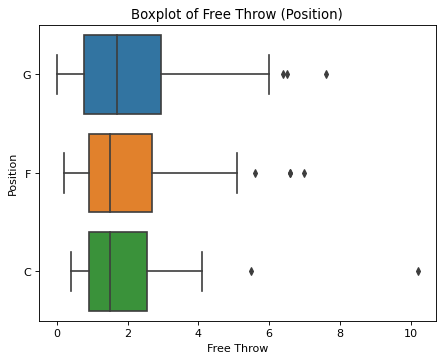

In [140]:
data = main_player[["PosCtg", "FT"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="FT", data=data, orient="h")
plt.xlabel('Free Throw')
plt.ylabel('Position')
plt.title('Boxplot of Free Throw (Position)')

Text(0.5, 1.0, 'Boxplot of Free Throw Percentage (Position)')

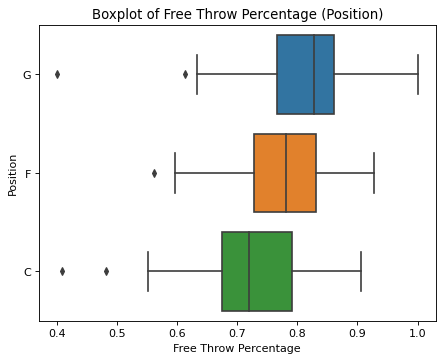

In [142]:
data = main_player[["PosCtg", "FT%"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="FT%", data=data, orient="h")
plt.xlabel('Free Throw Percentage')
plt.ylabel('Position')
plt.title('Boxplot of Free Throw Percentage (Position)')

Text(0.5, 1.0, 'Boxplot of Total Rebounds (Position)')

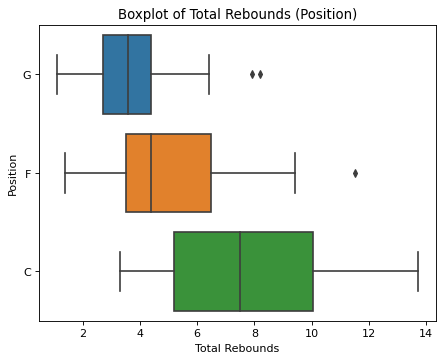

In [14]:
data = main_player[["PosCtg", "TRB"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="TRB", data=data, orient="h")
plt.xlabel('Total Rebounds')
plt.ylabel('Position')
plt.title('Boxplot of Total Rebounds (Position)')

Text(0.5, 1.0, 'Boxplot of Assists (Position)')

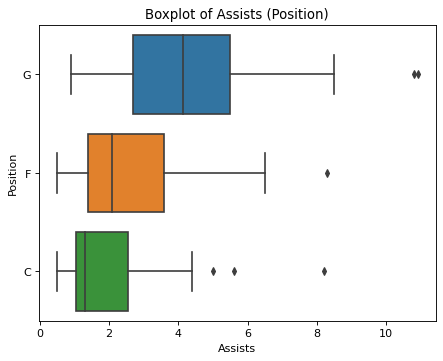

In [15]:
data = main_player[["PosCtg", "AST"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="AST", data=data, orient="h")
plt.xlabel('Assists')
plt.ylabel('Position')
plt.title('Boxplot of Assists (Position)')

Text(0.5, 1.0, 'Boxplot of Steals (Position)')

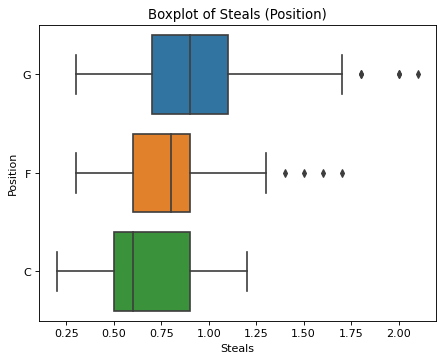

In [16]:
data = main_player[["PosCtg", "STL"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="STL", data=data, orient="h")
plt.xlabel('Steals')
plt.ylabel('Position')
plt.title('Boxplot of Steals (Position)')

Text(0.5, 1.0, 'Boxplot of Blocks (Position)')

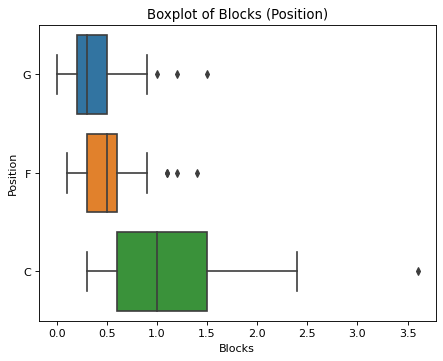

In [17]:
data = main_player[["PosCtg", "BLK"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="BLK", data=data, orient="h")
plt.xlabel('Blocks')
plt.ylabel('Position')
plt.title('Boxplot of Blocks (Position)')

Text(0.5, 1.0, 'Boxplot of Turnovers (Position)')

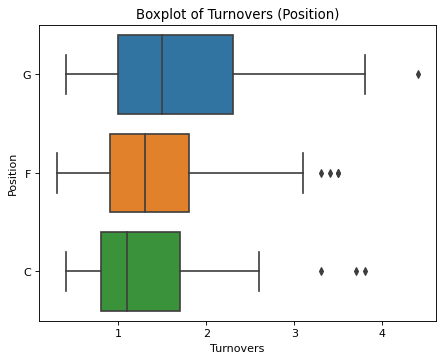

In [18]:
data = main_player[["PosCtg", "TOV"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="TOV", data=data, orient="h")
plt.xlabel('Turnovers')
plt.ylabel('Position')
plt.title('Boxplot of Turnovers (Position)')

Text(0.5, 1.0, 'Boxplot of Personal Fouls (Position)')

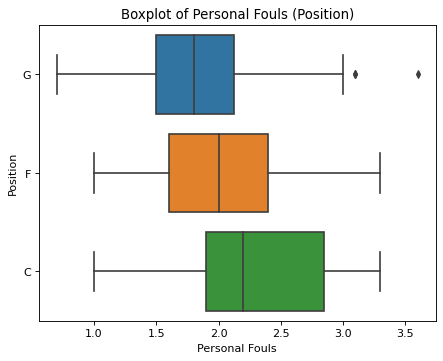

In [19]:
data = main_player[["PosCtg", "PF"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="PF", data=data, orient="h")
plt.xlabel('Personal Fouls')
plt.ylabel('Position')
plt.title('Boxplot of Personal Fouls (Position)')

Text(0.5, 1.0, 'Boxplot of 2023-24 Salary (Position)')

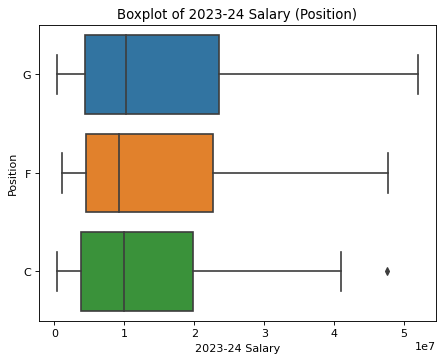

In [21]:
data = main_player[["PosCtg", "2023-24_Salary"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="2023-24_Salary", data=data, orient="h")
plt.xlabel('2023-24 Salary')
plt.ylabel('Position')
plt.title('Boxplot of 2023-24 Salary (Position)')

### Advanced Statistics

#### PER(Player Efficiency Rate)

評估籃球球員每一分鐘能為自己的球隊所帶來的貢獻值

PER:
average:  14.98491379310346
standar deviation:  4.514725522586342
skewness:  0.7850605096808299


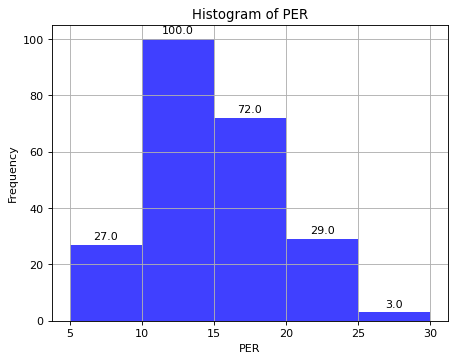

In [19]:
bin_range = range(5, 35, 5)
counts, bins, rects = plt.hist(main_player["PER"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('PER')
plt.ylabel('Frequency')
plt.title('Histogram of PER')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("PER:")
print("average: ", np.mean(main_player["PER"]))
print("standar deviation: ", np.std(main_player["PER"]))
print("skewness: ", skewness(main_player["PER"]))

Text(0.5, 1.0, 'Boxplot of PER')

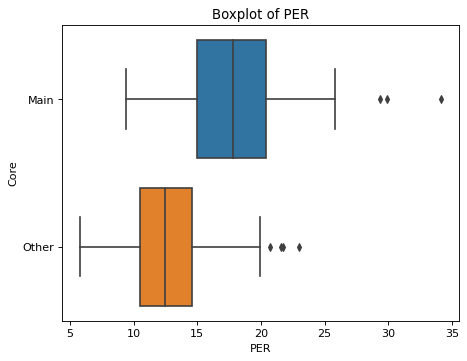

In [18]:
data = main_player[["Core", "PER"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="PER", data=data, orient="h")
plt.xlabel('PER')
plt.ylabel('Core')
plt.title('Boxplot of PER')

Text(0.5, 1.0, 'Boxplot of PER (Position)')

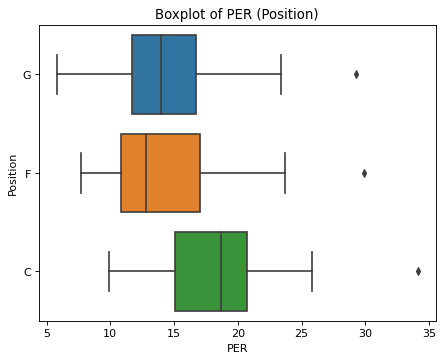

In [100]:
data = main_player[["PosCtg", "PER"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="PER", data=data, orient="h")
plt.xlabel('PER')
plt.ylabel('Position')
plt.title('Boxplot of PER (Position)')

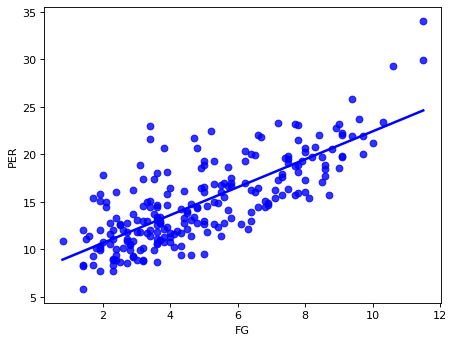

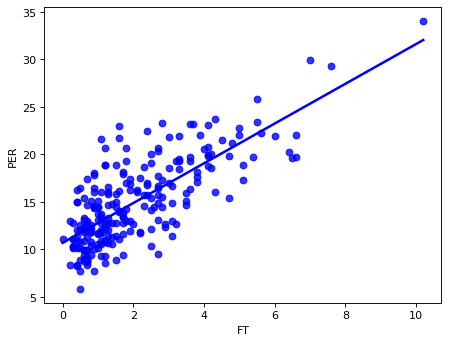

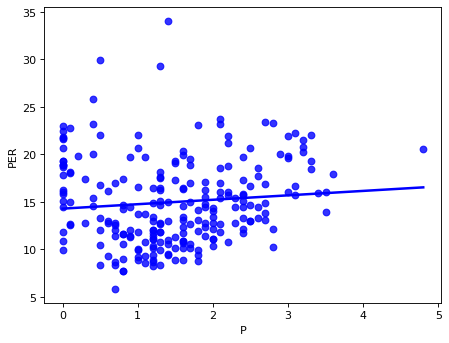

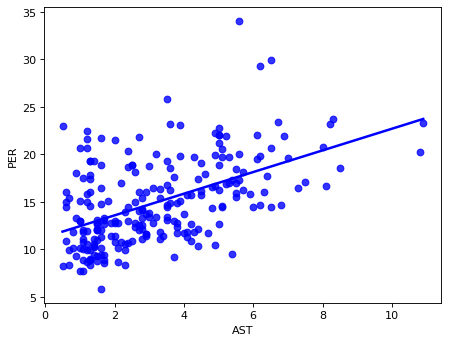

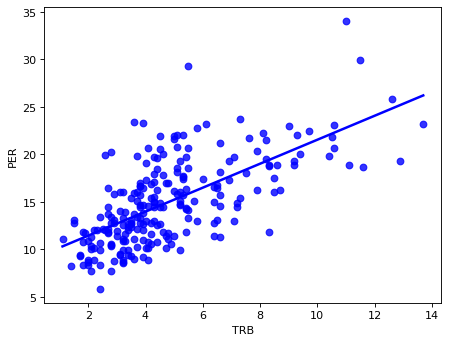

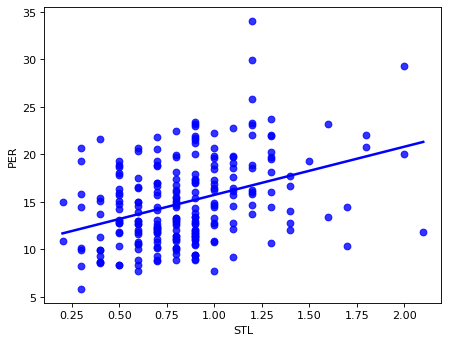

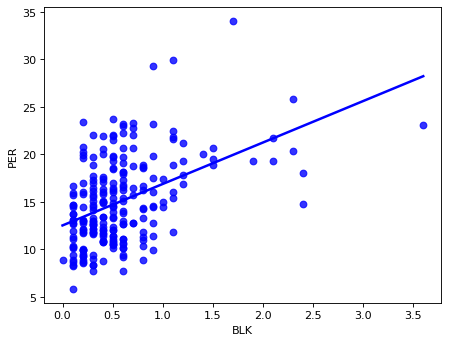

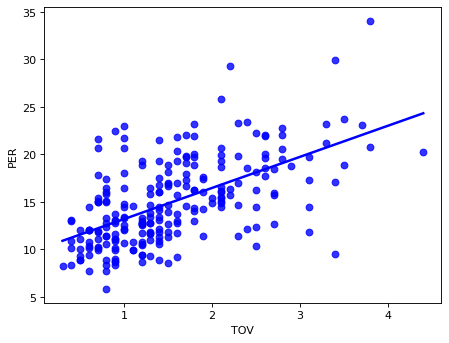

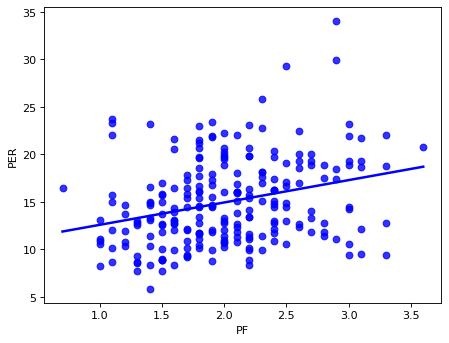

In [61]:
y_var = main_player['PER'].values
xnames = ["FG", "FT", "P", "AST", "TRB", "STL", "BLK", "TOV", "PF"]
for aname in xnames:
    x_var = main_player[aname].values
    _ = sns.regplot(x=x_var, y=y_var, data =main_player, color = 'b', ci = None)
    plt.xlabel(aname)
    plt.ylabel('PER')
    plt.show()

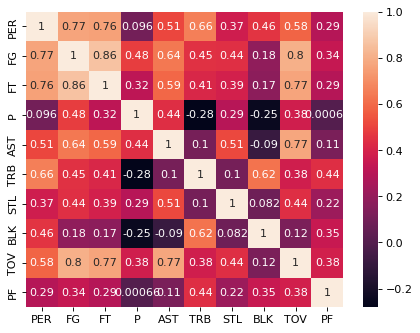

In [62]:
corr_per = main_player[["PER", "FG", "FT", "P", "AST", "TRB", "STL", "BLK", "TOV", "PF"]].corr()
_ = sns.heatmap(corr_per, annot=True)

#### USG% (Usage Percentage)

一個球員終結了球隊多少比例的進攻機會

USG:
average:  19.75172413793103
standar deviation:  6.049187502561108
skewness:  0.49643979573891095


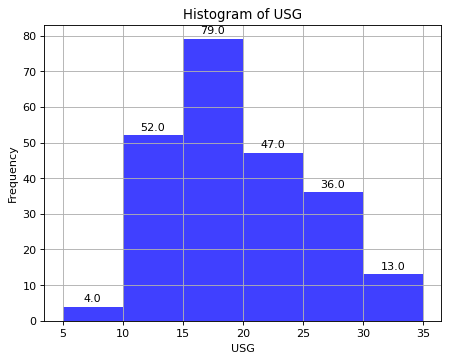

In [20]:
bin_range = range(5, 40, 5)
counts, bins, rects = plt.hist(main_player["USG%"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('USG')
plt.ylabel('Frequency')
plt.title('Histogram of USG')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("USG:")
print("average: ", np.mean(main_player["USG%"]))
print("standar deviation: ", np.std(main_player["USG%"]))
print("skewness: ", skewness(main_player["USG%"]))

Text(0.5, 1.0, 'Boxplot of PER')

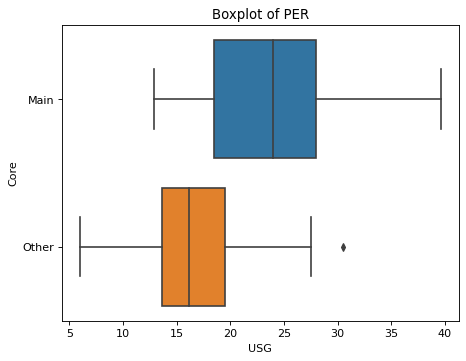

In [74]:
data = main_player[["Core", "USG%"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="USG%", data=data, orient="h")
plt.xlabel('USG')
plt.ylabel('Core')
plt.title('Boxplot of PER')

Text(0.5, 1.0, 'Boxplot of USG (Position)')

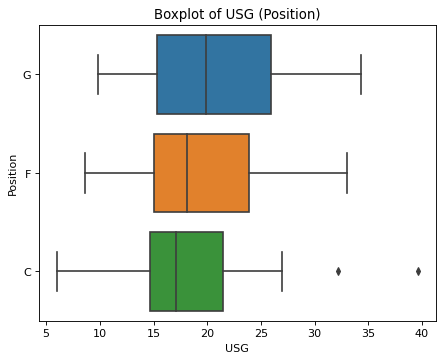

In [75]:
data = main_player[["PosCtg", "USG%"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="USG%", data=data, orient="h")
plt.xlabel('USG')
plt.ylabel('Position')
plt.title('Boxplot of USG (Position)')

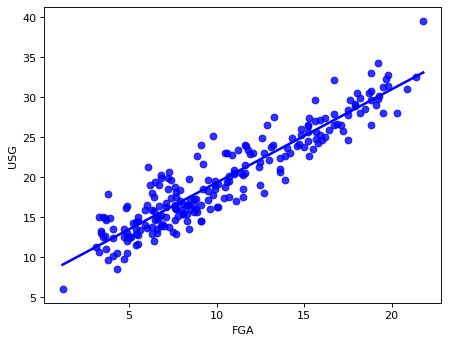

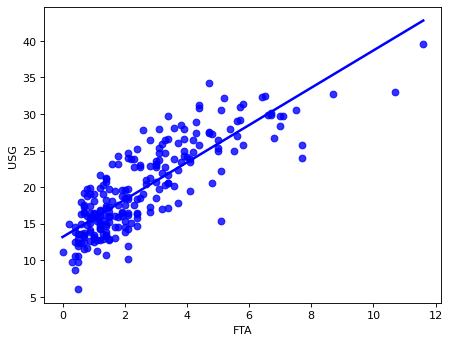

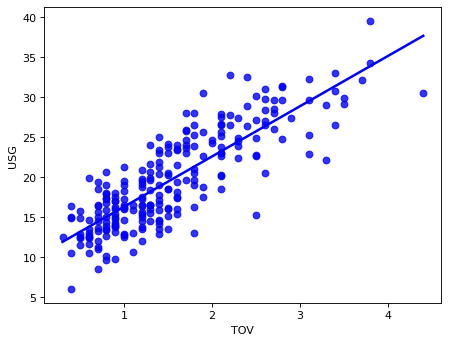

In [78]:
y_var = main_player['USG%'].values
xnames = ["FGA", "FTA", "TOV"]
for aname in xnames:
    x_var = main_player[aname].values
    _ = sns.regplot(x=x_var, y=y_var, data =main_player, color = 'b', ci = None)
    plt.xlabel(aname)
    plt.ylabel('USG')
    plt.show()

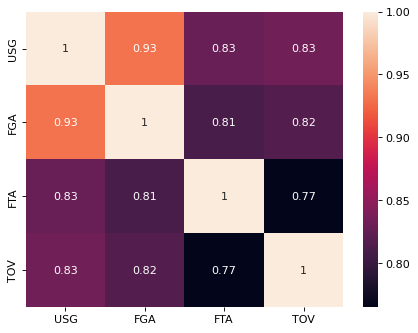

In [91]:
corr_per = main_player[["USG", "FGA", "FTA", "TOV"]].corr()
_ = sns.heatmap(corr_per, annot=True)

#### Win Shares Per 48 Minutes

該球員平均每48分鐘所能貢獻的勝場數

WS/48:
average:  0.10060344827586207
standar deviation:  0.05471420721227725
skewness:  0.2791249748585736


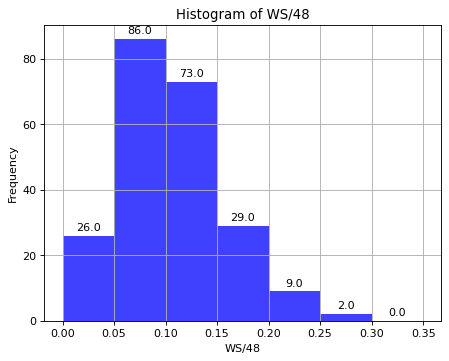

In [21]:
bin_range = [x / 20.0 for x in range(0, 8)]
counts, bins, rects = plt.hist(main_player["WS/48"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('WS/48')
plt.ylabel('Frequency')
plt.title('Histogram of WS/48')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("WS/48:")
print("average: ", np.mean(main_player["WS/48"]))
print("standar deviation: ", np.std(main_player["WS/48"]))
print("skewness: ", skewness(main_player["WS/48"]))

Text(0.5, 1.0, 'Boxplot of WS/48')

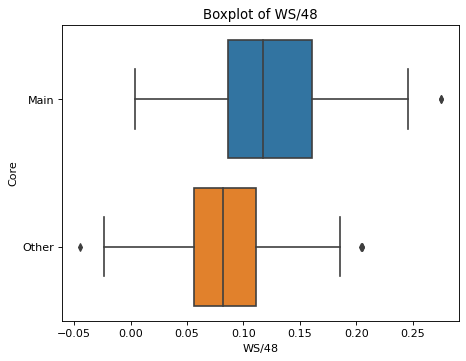

In [67]:
data = main_player[["Core", "WS/48"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="WS/48", data=data, orient="h")
plt.xlabel('WS/48')
plt.ylabel('Core')
plt.title('Boxplot of WS/48')

Text(0.5, 1.0, 'Boxplot of WS/48 (Position)')

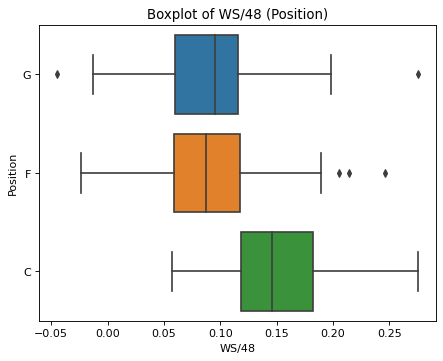

In [103]:
data = main_player[["PosCtg", "WS/48"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="WS/48", data=data, orient="h")
plt.xlabel('WS/48')
plt.ylabel('Position')
plt.title('Boxplot of WS/48 (Position)')

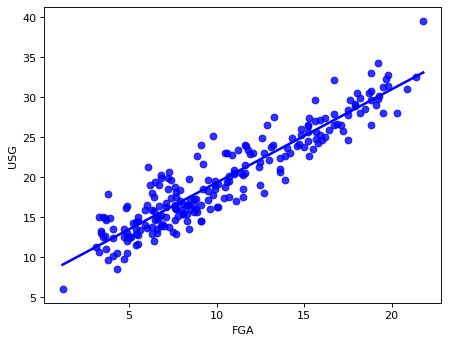

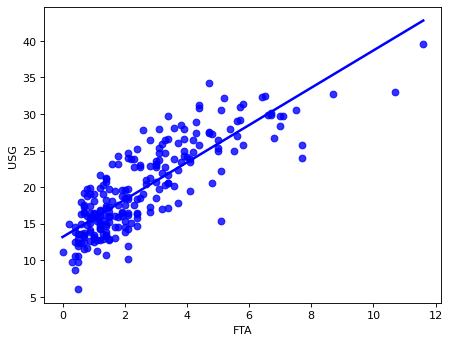

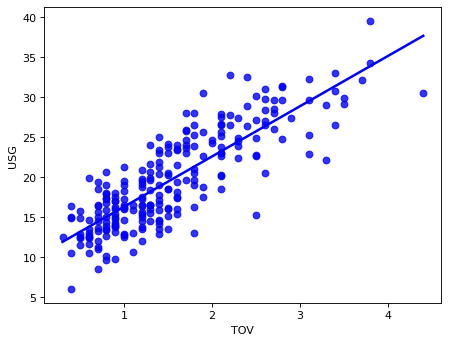

In [90]:
y_var = main_player_usg['USG'].values
xnames = ["FGA", "FTA", "TOV"]
for aname in xnames:
    x_var = main_player_usg[aname].values
    _ = sns.regplot(x=x_var, y=y_var, data =main_player, color = 'b', ci = None)
    plt.xlabel(aname)
    plt.ylabel('USG')
    plt.show()

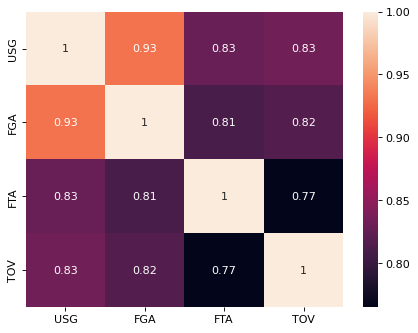

In [91]:
corr_per = main_player[["USG", "FGA", "FTA", "TOV"]].corr()
_ = sns.heatmap(corr_per, annot=True)

#### VBPM (Value Over Replacement Player)

Replacement Player: players whose BPM (Box Plus/Minus) = -2.

計算該球員整季的價值比Replacement Player高出多少、

VORP:
average:  1.099137931034483
standar deviation:  1.5457949461224765
skewness:  1.2325882577724072


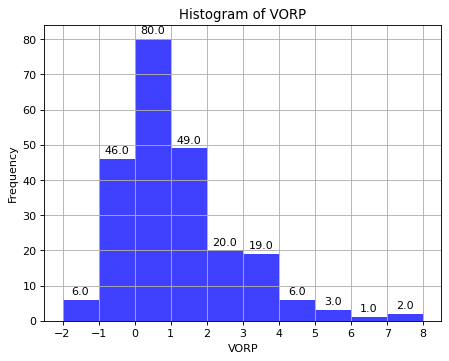

In [23]:
bin_range = range(-2, 9)
counts, bins, rects = plt.hist(main_player["VORP"], bins = bin_range, density=False, facecolor='b', alpha=0.75)
plt.xlabel('VORP')
plt.ylabel('Frequency')
plt.title('Histogram of VORP')
plt.grid(True)
plt.xticks(bin_range)
autolabel(rects)

print("VORP:")
print("average: ", np.mean(main_player["VORP"]))
print("standar deviation: ", np.std(main_player["VORP"]))
print("skewness: ", skewness(main_player["VORP"]))

Text(0.5, 1.0, 'Boxplot of VORP')

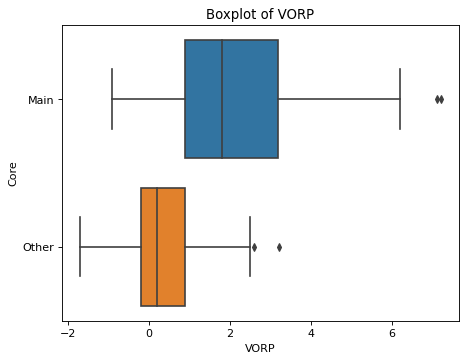

In [24]:
data = main_player[["Core", "VORP"]]
data["id"] = data.index
ax1 = sns.boxplot(y="Core", x="VORP", data=data, orient="h")
plt.xlabel('VORP')
plt.ylabel('Core')
plt.title('Boxplot of VORP')

Text(0.5, 1.0, 'Boxplot of VORP (Position)')

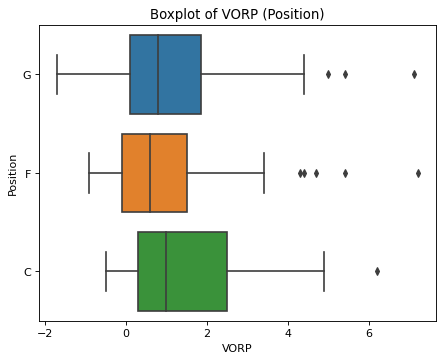

In [25]:
data = main_player[["PosCtg", "VORP"]]
data["id"] = data.index
ax1 = sns.boxplot(y="PosCtg", x="VORP", data=data, orient="h")
plt.xlabel('VORP')
plt.ylabel('Position')
plt.title('Boxplot of VORP (Position)')